In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import neattext as nt
import neattext.functions as nfx
import unidecode
from neattext import TextMetrics
import re
from collections import Counter

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

In [4]:
data = pd.read_csv("data_tweets.csv", sep = ";")
data

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type
0,1435054999852175365,"Supuestamente iban a ser 3,000 sólo en el Parq...",•𝐉𝐏•,JPGramajoC,2021-09-07T01:39:08.000Z,Tue Sep 07 01:39:08 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,https://twitter.com/evelynmorataya/status/1435...,2,1,NaN
1,1435054877579882499,RT @MinSaludGuate : Con la finalidad de apoyar...,Elizabeth Aguilar,mbettyaguilar,2021-09-07T01:38:39.000Z,Tue Sep 07 01:38:39 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,0,photo
2,1435054791768645633,RT @PrensaComunitar : Once médicos cubanos sum...,Judith Colón J.,JudithColnJ1,2021-09-07T01:38:19.000Z,Tue Sep 07 01:38:19 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Retweet,https://www.prensacomunitaria.org/2021/09/once...,0,0,NaN
3,1435054705558835202,RT @cronicagt : Un grupo de médicos del Hospit...,Jhony Cam,jhony_cam,2021-09-07T01:37:58.000Z,Tue Sep 07 01:37:58 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Retweet,https://cronica.com.gt/medicos-piden-a-diputad...,0,0,NaN
4,1435054053638168578,RT @lahoragt : Los directores de los hospitale...,Tamara Reyes,TamaraR77259349,2021-09-07T01:35:23.000Z,Tue Sep 07 01:35:23 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,0,0,photo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14225,1434655109754019840,RT @ManfredoGuate : Ante la posibilidad que el...,Daniel Perez,perez1k,2021-09-05T23:10:07.000Z,Sun Sep 05 23:10:07 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo
14226,1434654873824505856,RT @Tio_Politico : Quien diría que @msemillagt...,MariaM,MariaMartaU,2021-09-05T23:09:11.000Z,Sun Sep 05 23:09:11 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,0,1,NaN
14227,1434654765565321219,RT @MVillacortaOf : MUCHO CIRCO Y POCO PAN:\r\...,Edgar Godinez,GodinezEdgar,2021-09-05T23:08:45.000Z,Sun Sep 05 23:08:45 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,NaN,0,0,NaN
14228,1434654646413500420,RT @Lord_VaderTG : El novio del diputado semil...,tío ton,tioton31,2021-09-05T23:08:16.000Z,Sun Sep 05 23:08:16 +0000 2021,0,0,es,"<a href=""http://twitter.com/download/android"" ...",Retweet,NaN,1,0,photo


#### Tenemos la información de 14,230 tweets en español reciente. Algunos han sido retweteados, por ellos debemos encarganos de limpiar la data para poder analizar, principalmente la información de los tweets

In [5]:
data.describe()

,Tweet Id,Favorites,Retweets,Hashtags,Mentions
count,1.423000e+04,14230.000000,14230.000000,14230.000000,14230.000000
mean,1.434597e+18,2.288897,0.615039,1.074209,0.494519
std,5.168183e+14,26.066325,6.627002,1.564452,1.101404
min,1.432012e+18,0.000000,0.000000,0.000000,0.000000
25%,1.434348e+18,0.000000,0.000000,0.000000,0.000000
50%,1.434727e+18,0.000000,0.000000,1.000000,0.000000
75%,1.435016e+18,0.000000,0.000000,1.000000,1.000000
max,1.435055e+18,1144.000000,287.000000,17.000000,22.000000


In [6]:
data.isna().sum().to_frame()

,0
Tweet Id,0
Text,0
Name,0
Screen Name,0
UTC,0
Created At,0
Favorites,0
Retweets,0
Language,0
Client,0


#### Podemos observar que casi no hay datos faltantes en la mayoría de variables. Por otro lado, las variables que tienen datos faltantes no son tan relevantes para el estudio que se realzizará por lo que podemos removerlas tranquilamente.

In [7]:
data.columns

Index(['Tweet Id', 'Text', 'Name', 'Screen Name', 'UTC', 'Created At',
       'Favorites', 'Retweets', 'Language', 'Client', 'Tweet Type', 'URLs',
       'Hashtags', 'Mentions', 'Media Type'],
      dtype='object')

## Vamos a definir un DataFrame para hacer la limpieza

In [8]:
data_limpieza = data.drop(columns = ['Screen Name', 'UTC', 'Created At',
       'Favorites', 'Language', 'Client', 'URLs', 'Mentions', 'Media Type']) 

### Removemos todas las variables que no son de interés o relevantes para el estudio

In [9]:
data_limpieza

,Tweet Id,Text,Name,Retweets,Tweet Type,Hashtags
0,1435054999852175365,"Supuestamente iban a ser 3,000 sólo en el Parq...",•𝐉𝐏•,0,Tweet,2
1,1435054877579882499,RT @MinSaludGuate : Con la finalidad de apoyar...,Elizabeth Aguilar,0,Retweet,0
2,1435054791768645633,RT @PrensaComunitar : Once médicos cubanos sum...,Judith Colón J.,0,Retweet,0
3,1435054705558835202,RT @cronicagt : Un grupo de médicos del Hospit...,Jhony Cam,0,Retweet,0
4,1435054053638168578,RT @lahoragt : Los directores de los hospitale...,Tamara Reyes,0,Retweet,0
...,...,...,...,...,...,...
14225,1434655109754019840,RT @ManfredoGuate : Ante la posibilidad que el...,Daniel Perez,0,Retweet,1
14226,1434654873824505856,RT @Tio_Politico : Quien diría que @msemillagt...,MariaM,0,Retweet,0
14227,1434654765565321219,RT @MVillacortaOf : MUCHO CIRCO Y POCO PAN:\r\...,Edgar Godinez,0,Retweet,0
14228,1434654646413500420,RT @Lord_VaderTG : El novio del diputado semil...,tío ton,0,Retweet,1


### Ahora vamos a comenzaar con la limpieza de texto

In [153]:
s = data_limpieza["Text"]

### Pasamos todo a mayúsuclas

In [154]:
s = s.str.upper()

### Removemos los Stopwords (en Español)

In [155]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_stopwords(lang = "es")

In [156]:
s

0        SUPUESTAMENTE IBAN A 3,000 PARQUE INDUSTRIA, ?...
1        RT @MINSALUDGUATE : FINALIDAD APOYAR A PANDEMI...
2        RT @PRENSACOMUNITAR : ONCE MEDICOS CUBANOS SUM...
3        RT @CRONICAGT : GRUPO MEDICOS HOSPITAL TEMPORA...
4        RT @LAHORAGT : DIRECTORES HOSPITALES, ROOSEVEL...
                               ...                        
14225    RT @MANFREDOGUATE : POSIBILIDAD CONGRESO APRUE...
14226    RT @TIO_POLITICO : DIRIA @MSEMILLAGT SERIA ALI...
14227    RT @MVILLACORTAOF : CIRCO Y PAN: PROFUNDA TRIS...
14228    RT @LORD_VADERTG : NOVIO DIPUTADO SEMILLERO RO...
14229    RT @REALRODRIGOPOLO : PARDO PINEDA APOYANDO RO...
Name: Text, Length: 14230, dtype: object

### Removemos e - Mails, Números, Números de Teléfono, BTC Adresses, URL, Emojis, HTML Tags

In [157]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_emails()
    s[i] = nt.TextFrame(str(s[i])).remove_numbers()
    s[i] = nt.TextFrame(str(s[i])).remove_phone_numbers()
    s[i] = nt.TextFrame(str(s[i])).remove_btc_address()
    s[i] = nt.TextFrame(str(s[i])).remove_urls()
    s[i] = nt.TextFrame(str(s[i])).remove_emojis()
    s[i] = nt.TextFrame(str(s[i])).remove_html_tags()
    s[i] = nt.TextFrame(str(s[i])).remove_stopwords(lang = "es")

### Removemos las tildes

In [158]:
for i in range(len(s)):
    s[i] = unidecode.unidecode(str(s[i]))
    s[i] = re.sub(' +', ' ',str(s[i]))
    s[i] = nt.TextFrame(str(s[i])).remove_stopwords(lang = "es")

### Removemos signos de puntuación

In [159]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_puncts()

In [160]:
s

0        SUPUESTAMENTE IBAN A  PARQUE INDUSTRIA VAA VOS...
1        RT @MINSALUDGUATE : FINALIDAD APOYAR A PANDEMI...
2        RT @PRENSACOMUNITAR : ONCE MEDICOS CUBANOS SUM...
3        RT @CRONICAGT : GRUPO MEDICOS HOSPITAL TEMPORA...
4        RT @LAHORAGT : DIRECTORES HOSPITALES ROOSEVELT...
                               ...                        
14225    RT @MANFREDOGUATE : POSIBILIDAD CONGRESO APRUE...
14226    RT @TIOPOLITICO : DIRIA @MSEMILLAGT SERIA ALIA...
14227    RT @MVILLACORTAOF : CIRCO Y PAN: PROFUNDA TRIS...
14228    RT @LORDVADERTG : NOVIO DIPUTADO SEMILLERO ROM...
14229    RT @REALRODRIGOPOLO : PARDO PINEDA APOYANDO RO...
Name: Text, Length: 14230, dtype: object

### Removemos caracteres especiales

In [161]:
for i in range(len(s)):
    s[i] = nt.TextFrame(str(s[i])).remove_special_characters()
    s[i] = nfx.remove_custom_pattern(str(s[i]),'RT ')
    s[i] = nt.TextFrame(str(s[i])).remove_stopwords(lang = "es")

In [162]:
s

0        SUPUESTAMENTE IBAN A PARQUE INDUSTRIA VAA VOS ...
1        MINSALUDGUATE FINALIDAD APOYAR A PANDEMIA COVI...
2        PRENSACOMUNITAR ONCE MEDICOS CUBANOS SUMARAN C...
3        CRONICAGT GRUPO MEDICOS HOSPITAL TEMPORAL PARQ...
4        LAHORAGT DIRECTORES HOSPITALES ROOSEVELT SAN J...
                               ...                        
14225    MANFREDOGUATE POSIBILIDAD CONGRESO APRUEBE CAL...
14226    TIOPOLITICO DIRIA MSEMILLAGT SERIA ALIADE PRES...
14227    MVILLACORTAOF CIRCO Y PAN PROFUNDA TRISTEZA DI...
14228    LORDVADERTG NOVIO DIPUTADO SEMILLERO ROMAN CAS...
14229    REALRODRIGOPOLO PARDO PINEDA APOYANDO ROBO GIA...
Name: Text, Length: 14230, dtype: object

In [163]:
final_string = ""
for i in s:
    final_string += str(i) + " "
final_string = final_string[:-1]

In [171]:
text_frame = nt.TextFrame(final_string)
text_frame = text_frame.remove_stopwords(lang = "en")

In [172]:
text_frame.describe()

Key      Value          
Length  : 1868958        
vowels  : 741513         
consonants: 928937         
stopwords: 0              
punctuations: 0              
special_char: 0              
tokens(whitespace): 198509         
tokens(words): 198509         


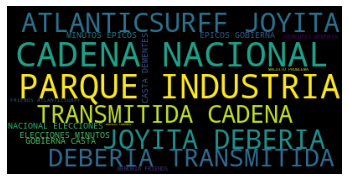

In [185]:
wordcloud = WordCloud().generate(str(text_frame))


plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [183]:
term_frequencies = Counter(str(text_frame).split())

In [184]:
term_frequencies

Counter({'SUPUESTAMENTE': 36,
         'IBAN': 3,
         'PARQUE': 2123,
         'INDUSTRIA': 2310,
         'VAA': 3,
         'VOS': 42,
         'DRGIAMMATTEI': 1000,
         'OJALA': 335,
         'MEDICOS': 1501,
         'DEMAS': 43,
         'PERSONAL': 570,
         'SALUD': 652,
         'ENTIENDEN': 5,
         'MALDITO': 928,
         'PROBLEMA': 1029,
         'DONDEESTAELDINERO': 365,
         'RENUNCIAGIAMMATTEI': 2360,
         'MINSALUDGUATE': 211,
         'FINALIDAD': 7,
         'APOYAR': 428,
         'PANDEMIA': 725,
         'COVID': 875,
         'FUNDACION': 14,
         'INFANTIL': 11,
         'RONALD': 17,
         'MCDONALD': 17,
         'HOSPEDARA': 9,
         'CUBANOS': 642,
         'SUMARAN': 14,
         'EQUIPO': 259,
         'HOSPITAL': 1500,
         'TEMPORAL': 386,
         'FORTALECERAN': 8,
         'ATENCION': 211,
         'BRINDA': 67,
         'POBLACION': 457,
         'PRENSACOMUNITAR': 89,
         'COMBATE': 154,
         'CENTRO':